In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

# EDA - flops & hits

In [2]:
data = pd.read_csv("pre_EDA_dataset.csv", index_col = 0)
data.drop(columns = ["song_name", "artist", "spotify_track_id"], inplace = True)

making a correlation heatmap to identify high correlated columns 

<AxesSubplot:>

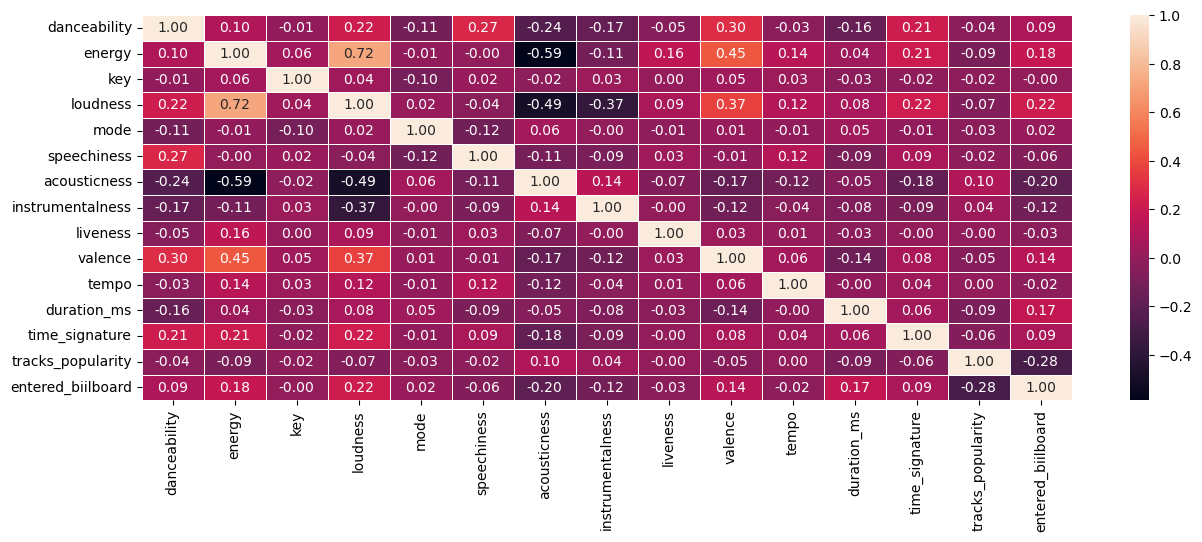

In [3]:
fig, ax = plt.subplots(figsize=(15,5))  
data_heatmap = pd.DataFrame(data, columns = data.columns)
sns.heatmap(data_heatmap.corr(), annot=True, linewidth=0.5,fmt=".2f")

cheaking the hits and flops ratio using pieplot

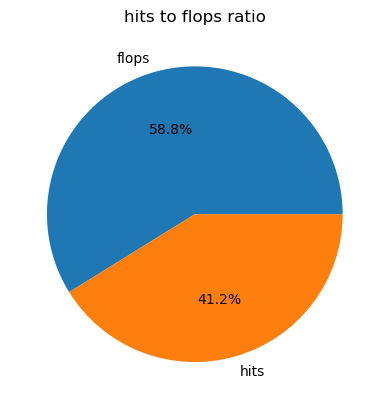

In [4]:
counts = data.entered_biilboard.value_counts()
labels = ['flops', 'hits']  # Labels for the two binary values
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('hits to flops ratio')
plt.show()

# What are the characteristics of a "hit" song?

<AxesSubplot:xlabel='key', ylabel='count'>

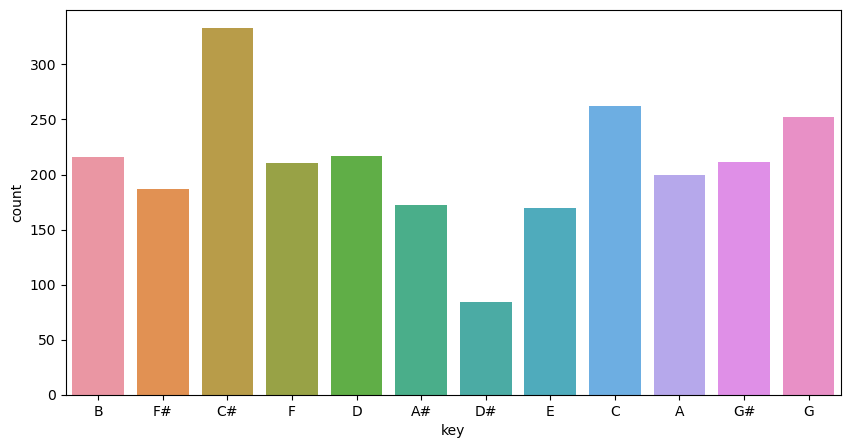

In [5]:
# Define a mapping between numeric key data and musical notation
key_map = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}
fig, ax = plt.subplots(1, figsize = (10,5))
plt.subplots_adjust(hspace=0.25)
sns.countplot(data = data , x = data.key.map(key_map))    

<AxesSubplot:xlabel='time_signature', ylabel='count'>

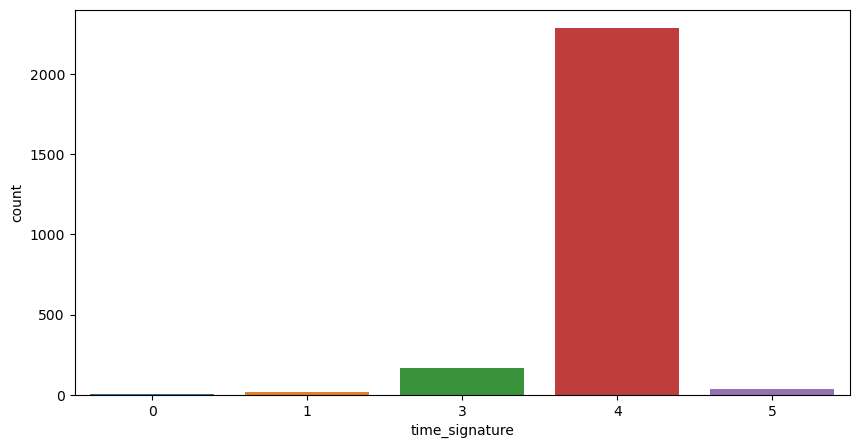

In [6]:
fig, ax = plt.subplots(1, figsize = (10,5))
plt.subplots_adjust(hspace=0.25)
sns.countplot(data = data , x = data.time_signature)  

<AxesSubplot:xlabel='mode', ylabel='count'>

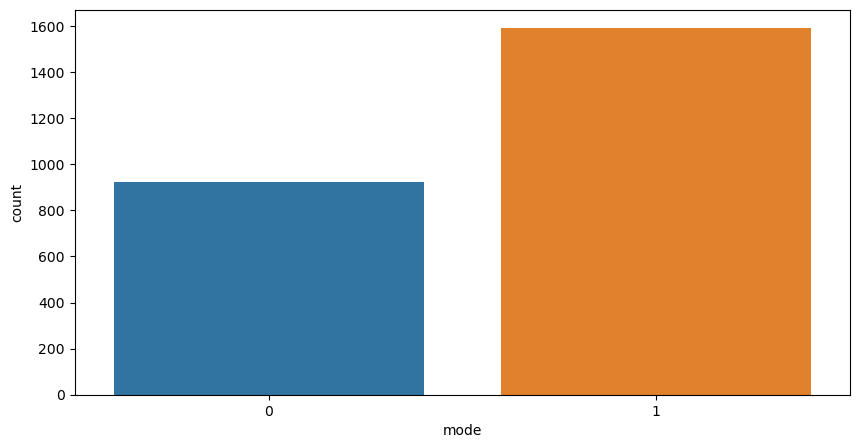

In [7]:
fig, ax = plt.subplots(1, figsize = (10,5))
plt.subplots_adjust(hspace=0.25)
sns.countplot(data = data , x = data['mode'])  

# visualizing high correlated columns highlighting hits
usind 3 demantion scatterplots we visualize high correlated columns from the heatmap coloring the hits to identify certain connections

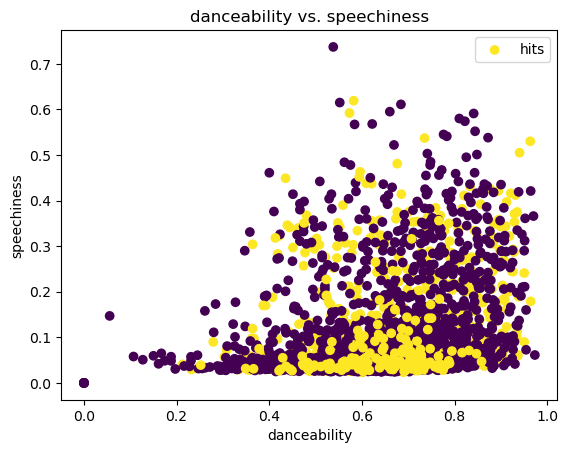

In [8]:
plt.scatter(data['danceability'], data['speechiness'], c=data['entered_biilboard'])
plt.title('{} vs. {}'.format('danceability', 'speechiness'))
plt.xlabel('danceability')
plt.ylabel('speechiness')
plt.legend(labels=["hits"])
plt.show()

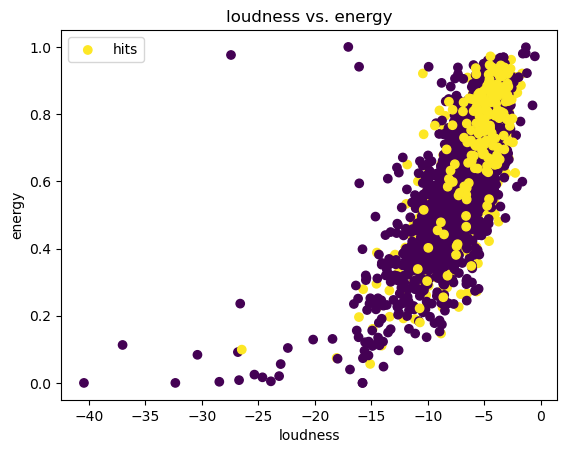

In [9]:
plt.scatter(data['loudness'], data['energy'], c=data['entered_biilboard'])
plt.title('{} vs. {}'.format('loudness', 'energy'))
plt.xlabel('loudness')
plt.ylabel('energy')
plt.legend(labels=["hits"])
plt.show()

# EDA hits

In [10]:
hits_df = pd.read_csv("hits_clean_data.csv", index_col = 0)

<AxesSubplot:>

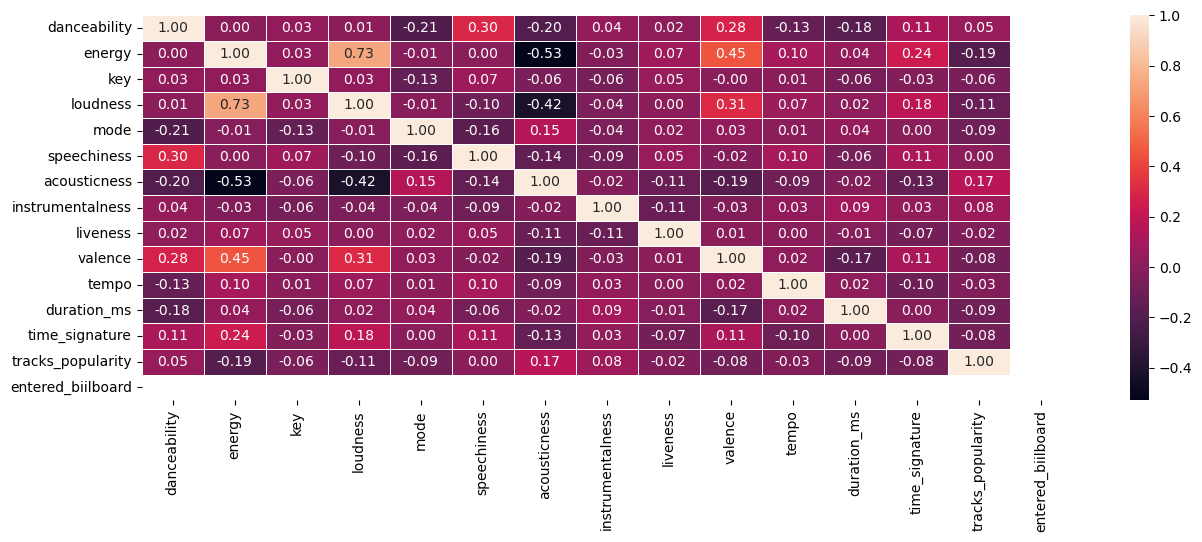

In [11]:
fig, ax = plt.subplots(figsize=(15,5))  
hits_df_heatmap = pd.DataFrame(hits_df, columns = hits_df.columns)
sns.heatmap(hits_df_heatmap.corr(), annot=True, linewidth=0.5,fmt=".2f")

In [13]:
### data_cln_outliers.to_csv('cln_data.csv')